In [1]:

import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import linmix
from scipy.stats import pearsonr
import math
import itertools
import json
from logerr import logify
from results import loadresults

In [2]:
res = loadresults()
#res = res.reindex([8,7,5,4,6,2,3,1,0])
res

,Region,sig2 [km/s],sig2er,sig [km/s],siger,m,mer,r0 [pc],r0er
0,Orion,12.648003,0.742833,3.556403,0.208872,1.073374,0.031151,0.067959,0.006121
1,M8,7.385188,1.242835,2.717570,0.457333,1.263906,0.176361,1.034714,0.236500
2,Carina,18.137617,1.393893,4.258828,0.327295,1.158353,0.276279,0.550457,0.082150
3,30 Dor,297.536688,39.611347,17.249252,2.296410,0.851961,0.077782,3.857852,1.064497
4,NGC 346,33.022801,2.568073,5.746547,0.446890,0.956389,0.047801,2.373683,0.293811
5,Hubble X,14.812259,2.672278,3.848670,0.694338,1.016097,0.080615,4.099418,0.325858
6,Hubble V,9.824044,3.534439,3.134333,1.127653,0.810433,0.093346,3.561965,0.451416
7,NGC 595,53.206356,4.643371,7.294269,0.636578,1.376368,0.087961,11.211662,0.739236
8,NGC 604,85.868750,20.418004,9.266539,2.203412,0.775075,0.207397,12.087616,6.443078


In [3]:
sig = res['sig [km/s]']
sig_er = res['siger']
X = logify(sig, sig_er)[0]
Xe = logify(sig, sig_er)[1]

1. Kennicut 1984: https://articles.adsabs.harvard.edu//full/1984ApJ...287..116K/0000122.000.html

In [4]:
L_data=pd.DataFrame()
L_data['Region'] = ['Orion','M8','Carina','30 Dor','346','H X', 'H V', '595', '604']
L_data['L(Ha) [erg/s]$^1$'] = [1e37,3e37,6e38,1.5e40,6e38,4e38,7.5e38,2.3e39,4.5e39]
L_data['log L(Ha) [erg/s]$^1$'] = np.log10(L_data['L(Ha) [erg/s]$^1$'] )
L_data.round(2)

,Region,L(Ha) [erg/s]$^1$,log L(Ha) [erg/s]$^1$
0,Orion,1.000000e+37,37.00
1,M8,3.000000e+37,37.48
2,Carina,6.000000e+38,38.78
3,30 Dor,1.500000e+40,40.18
4,346,6.000000e+38,38.78
5,H X,4.000000e+38,38.60
6,H V,7.500000e+38,38.88
7,595,2.300000e+39,39.36
8,604,4.500000e+39,39.65


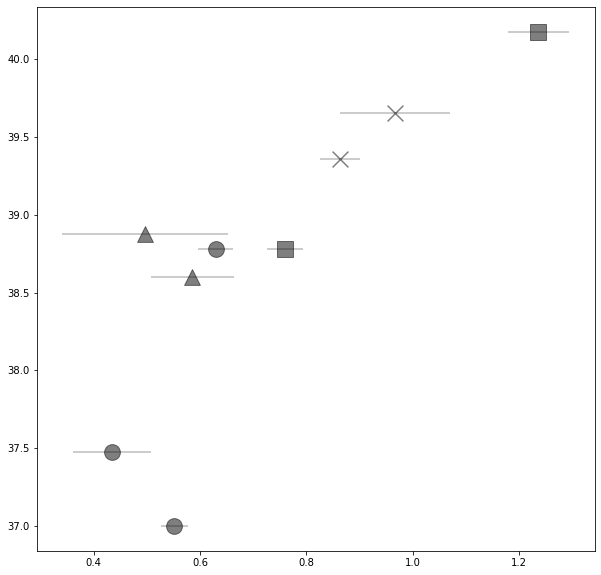

In [5]:
Y = L_data['log L(Ha) [erg/s]$^1$']

fig, ax = plt.subplots(figsize=(10,10))
ax.errorbar(X, Y, xerr=Xe, ls=" ", elinewidth=0.4, alpha=1.0, c="k")


marker=itertools.cycle(('o','o','o','s','s','^','^','x','x'))

for i in range(len(L_data)):
    ax.scatter(X[i], Y[i], marker=next(marker), s=250,zorder=0, c ='k', alpha=0.5)

In [6]:
X

0    0.551011
1    0.434181
2    0.629290
3    1.236770
4    0.759407
5    0.585311
6    0.496145
7    0.862982
8    0.966918
Name: sig [km/s], dtype: float64